In [1]:
from sklearn import svm

classifier = svm.SVC()

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_train = pd.read_csv("./train.csv")
data_train

,filename,dispersion_entropy,RDE,class
0,FNSZ325.mat,2.177414,0.004687,FNSZ
1,FNSZ443.mat,2.173413,0.005799,FNSZ
2,FNSZ457.mat,2.128589,0.014401,FNSZ
3,GNSZ018.mat,0.778805,0.549478,GNSZ
4,FNSZ331.mat,1.926150,0.065480,FNSZ
...,...,...,...,...
861,FNSZ300.mat,2.151531,0.008903,FNSZ
862,GNSZ029.mat,2.060288,0.019217,GNSZ
863,GNSZ001.mat,1.545435,0.161897,GNSZ
864,FNSZ328.mat,2.140018,0.013467,FNSZ


In [11]:
data_train['class'].value_counts()

FNSZ    521
GNSZ    172
CPSZ    132
ABSZ     14
TCSZ     11
TNSZ      9
SPSZ      5
MYSZ      2
Name: class, dtype: int64

In [12]:
data_train = data_train.drop(columns=["filename"])
data_train

,dispersion_entropy,RDE,class
0,2.177414,0.004687,FNSZ
1,2.173413,0.005799,FNSZ
2,2.128589,0.014401,FNSZ
3,0.778805,0.549478,GNSZ
4,1.926150,0.065480,FNSZ
...,...,...,...
861,2.151531,0.008903,FNSZ
862,2.060288,0.019217,GNSZ
863,1.545435,0.161897,GNSZ
864,2.140018,0.013467,FNSZ


In [13]:
classes_train = np.array(data_train['class'])
data_train = data_train.drop(columns=["class"])

In [14]:
data_train

,dispersion_entropy,RDE
0,2.177414,0.004687
1,2.173413,0.005799
2,2.128589,0.014401
3,0.778805,0.549478
4,1.926150,0.065480
...,...,...
861,2.151531,0.008903
862,2.060288,0.019217
863,1.545435,0.161897
864,2.140018,0.013467


In [15]:
classifier.fit(data_train,classes_train)

SVC()

In [16]:
data_test = pd.read_csv("./test.csv")
data_test = data_test.drop(columns=["filename"])
classes_test = np.array(data_test['class'])
data_test = data_test.drop(columns=["class"])

In [17]:
prediksi = classifier.predict(data_test)

In [18]:
data_train.iloc[[3]]

,dispersion_entropy,RDE
3,0.778805,0.549478


In [19]:
classifier.predict(data_train.iloc[[3]])

array(['FNSZ'], dtype=object)

In [20]:
classes_train[3]

'GNSZ'

In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes_test,prediksi)
print("Akurasi: ",str(acc))

Akurasi:  0.5985401459854015


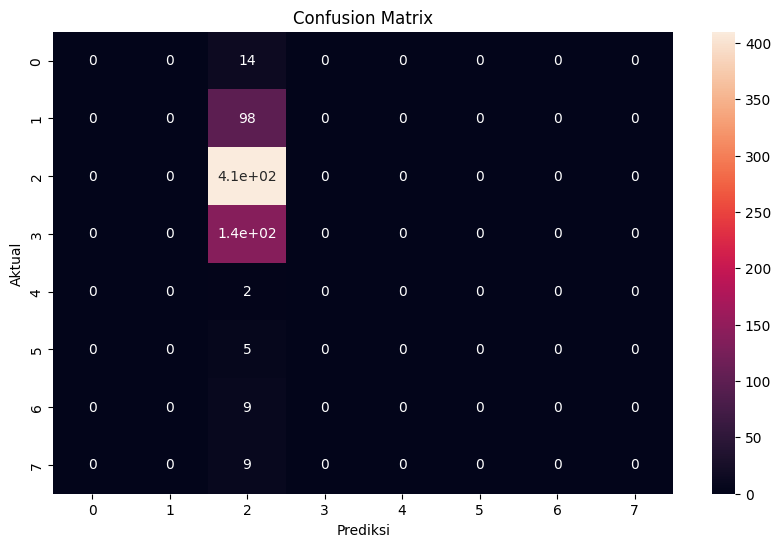

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(classes_test, prediksi)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()